In [15]:
import pandas as pd
import requests

pd.set_option('display.max_columns', 500)

def call_endpoint(url, max_level=3):
    resp = requests.get(url).json()
    data = pd.json_normalize(resp['data'], max_level=max_level)
    return data

url_leagues = 'https://partner-api.prizepicks.com/leagues'
df_leagues = call_endpoint(url_leagues)

df_leagues_filtered = df_leagues[['id', 'attributes.name']]
print(df_leagues_filtered)

     id attributes.name
0   226           NHL3P
1   234           NHL2P
2     7             NBA
3   150           CFB2H
4   194          WNBA2H
..  ...             ...
82  253             FPA
83  269           DARTS
84  138          TRUCKS
85  163          NFLSZN
86  173          NBASZN

[87 rows x 2 columns]


In [ ]:
i = 0
while i < len(df_leagues_filtered):
    print(df_leagues_filtered.iloc[i]["id"], df_leagues_filtered.iloc[i]["attributes.name"])
    i += 1

226 NHL3P
234 NHL2P
7 NBA
150 CFB2H
194 WNBA2H
195 WNBA4Q
243 SOCCER2H
20 CBB
153 CFB4Q
149 NBA4Q
25 NFL2H
80 NBA2H
152 NFL4Q
15 CFB
8 NHL
227 NHL1P
9 NFL
2 MLB
260 Power Slap
3 WNBA
245 NFL1Q
192 NBA1Q
231 MLBLIVE
84 NBA1H
82 SOCCER
35 NFL1H
266 SPECIALS
145 COD
262 SOCCERSZN
228 LIVGOLF
184 CFB1H
83 PRES
161 RL
189 NCAAB
193 WNBA1H
256 LPGA
267 HALO
230 LAX
44 NFLP
270 INDYCAR
151 EURO
254 LBSA
282 NHLP
162 CRICKET
271 UFL
165 AFL
236 NHLSZN
244 TENNIS LIVE
252 WNBASZN
41 HRDERBY
155 CBB2H
158 GLEAGUE
250 NBA SERIES
237 NBAP
261 MLBSZN2
242 SOCCER1H
176 WCBB
272 WCBB2H
190 MLBSZN
40 NBASL
255 SACB
251 NHL SERIES
188 NBASZN2
11 CFL
164 EUROS
42 BOXING
172 CFBSZN
12 MMA
265 CS2
121 LoL
274 R6
159 VAL
174 Dota2
268 APEX
5 TENNIS
1 PGA
131 EUROGOLF
135 KBO
238 AUSNBL
125 F1
4 NASCAR
137 XFINITY
253 FPA
269 DARTS
138 TRUCKS
163 NFLSZN
173 NBASZN


In [17]:
def call_endpoint(url, max_level=3):
    resp = requests.get(url)
    if resp.status_code == 200:
        data = pd.json_normalize(resp.json()['data'], max_level=max_level)
        return data
    else:
        return pd.DataFrame()

league_id = 82
url_projections = f'https://partner-api.prizepicks.com/projections?league_id={league_id}&per_page=1000'
df_projections = call_endpoint(url_projections)
print(df_projections.head())

         type       id attributes.adjusted_odds      attributes.board_time  \
0  projection  3313106                     True  2024-09-12T14:45:00-04:00   
1  projection  3312868                     None  2024-09-03T14:45:00-04:00   
2  projection  3312865                     None  2024-09-12T14:45:00-04:00   
3  projection  3312867                     None  2024-09-03T14:45:00-04:00   
4  projection  3312869                     None  2024-09-12T14:45:00-04:00   

  attributes.custom_image attributes.description attributes.end_time  \
0                    None                England                None   
1                    None                 Greece                None   
2                    None                England                None   
3                    None                 Greece                None   
4                    None                England                None   

  attributes.flash_sale_line_score         attributes.game_id  \
0                             Non

In [18]:
df_projections

,type,id,attributes.adjusted_odds,attributes.board_time,attributes.custom_image,attributes.description,attributes.end_time,attributes.flash_sale_line_score,attributes.game_id,attributes.in_game,attributes.is_live,attributes.is_promo,attributes.line_score,attributes.odds_type,attributes.projection_type,attributes.rank,attributes.refundable,attributes.start_time,attributes.stat_display_name,attributes.stat_type,attributes.status,attributes.tv_channel,attributes.updated_at,relationships.duration.data.type,relationships.duration.data.id,relationships.league.data.type,relationships.league.data.id,relationships.new_player.data.type,relationships.new_player.data.id,relationships.projection_type.data.type,relationships.projection_type.data.id,relationships.score.data,relationships.stat_average.data.type,relationships.stat_average.data.id,relationships.stat_type.data.type,relationships.stat_type.data.id
0,projection,3313106,True,2024-09-12T14:45:00-04:00,None,England,None,None,cw594pr9v7c7uo2qirb86pwd0,False,False,False,0.5,demon,Single Stat,5,True,2024-11-14T14:45:00-05:00,Shots On Target,Shots On Target,pre_game,None,2024-11-11T12:07:35-05:00,duration,11,league,82,new_player,212112,projection_type,2,None,stat_average,54018,stat_type,104
1,projection,3312868,None,2024-09-03T14:45:00-04:00,None,Greece,None,None,cw594pr9v7c7uo2qirb86pwd0,False,False,False,78.5,standard,Single Stat,5,True,2024-11-14T14:45:00-05:00,Passes Attempted,Passes Attempted,pre_game,None,2024-11-11T12:04:10-05:00,duration,11,league,82,new_player,199667,projection_type,2,None,stat_average,53776,stat_type,278
2,projection,3312865,None,2024-09-12T14:45:00-04:00,None,England,None,None,cw594pr9v7c7uo2qirb86pwd0,False,False,False,32.5,standard,Single Stat,5,True,2024-11-14T14:45:00-05:00,Passes Attempted,Passes Attempted,pre_game,None,2024-11-11T12:04:50-05:00,duration,11,league,82,new_player,171655,projection_type,2,None,stat_average,87446,stat_type,278
3,projection,3312867,None,2024-09-03T14:45:00-04:00,None,Greece,None,None,cw594pr9v7c7uo2qirb86pwd0,False,False,False,55.5,standard,Single Stat,5,True,2024-11-14T14:45:00-05:00,Passes Attempted,Passes Attempted,pre_game,None,2024-11-11T12:06:11-05:00,duration,11,league,82,new_player,172268,projection_type,2,None,stat_average,87447,stat_type,278
4,projection,3312869,None,2024-09-12T14:45:00-04:00,None,England,None,None,cw594pr9v7c7uo2qirb86pwd0,False,False,False,1.5,standard,Single Stat,5,True,2024-11-14T14:45:00-05:00,Tackles,Tackles,pre_game,None,2024-11-11T12:07:35-05:00,duration,11,league,82,new_player,171651,projection_type,2,None,stat_average,68477,stat_type,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,projection,3313105,True,2024-09-04T14:45:00-04:00,None,Rep. Ireland,None,None,cwo3v3l9vs95wjvs8tp143xuc,False,False,False,0.5,demon,Single Stat,103,True,2024-11-14T14:45:00-05:00,Shots On Target,Shots On Target,pre_game,None,2024-11-11T22:49:00-05:00,duration,11,league,82,new_player,177759,projection_type,2,None,stat_average,87498,stat_type,104
65,projection,3313110,True,2024-10-29T14:45:00-04:00,None,Finland,None,None,cwo3v3l9vs95wjvs8tp143xuc,False,False,False,0.5,demon,Single Stat,108,True,2024-11-14T14:45:00-05:00,Goals,Goals,pre_game,None,2024-11-11T15:50:54-05:00,duration,11,league,82,new_player,171641,projection_type,2,None,stat_average,69084,stat_type,29
66,projection,3313111,True,2024-09-04T14:45:00-04:00,None,Norway,None,None,cx6ord8t5udgbrglqspn3evis,False,False,False,0.5,demon,Single Stat,109,True,2024-11-14T14:45:00-05:00,Shots On Target,Shots On Target,pre_game,None,2024-11-11T19:16:50-05:00,duration,11,league,82,new_player,171804,projection_type,2,None,stat_average,87501,stat_type,104
67,projection,3313112,True,2024-09-05T10:00:00-04:00,None,Kazakhstan,None,None,cvmuae4ee7kiz2ilajl8dvh90,False,False,False,0.5,demon,Single Stat,110,True,2024-11-14T10:00:00-05:00,Shots On Target,Shots On Target,p

In [ ]:
def call_endpoint(url, max_level=3, include_player_info=False):
    resp = requests.get(url).json()
    data = pd.json_normalize(resp['data'], max_level=max_level)
    
    if include_player_info and 'included' in resp:
        included = pd.json_normalize(resp['included'], max_level=max_level)
        player_info = included[included['type'] == 'new_player'][['id', 'attributes.name', 'attributes.team', 'attributes.position']]
        data = data.merge(player_info, how='left', left_on='relationships.new_player.data.id', right_on='id', suffixes=('', '_player'))
    
    print("Columns after merge:", data.columns)  
    return data

league_id = 82
url_projections = f'https://partner-api.prizepicks.com/projections?league_id={league_id}&per_page=1000'
df_projections = call_endpoint(url_projections, include_player_info=True)

print(df_projections.head())

Columns after merge: Index(['type', 'id', 'attributes.adjusted_odds', 'attributes.board_time',
       'attributes.custom_image', 'attributes.description',
       'attributes.end_time', 'attributes.flash_sale_line_score',
       'attributes.game_id', 'attributes.in_game', 'attributes.is_live',
       'attributes.is_promo', 'attributes.line_score', 'attributes.odds_type',
       'attributes.projection_type', 'attributes.rank',
       'attributes.refundable', 'attributes.start_time',
       'attributes.stat_display_name', 'attributes.stat_type',
       'attributes.status', 'attributes.tv_channel', 'attributes.updated_at',
       'relationships.duration.data.type', 'relationships.duration.data.id',
       'relationships.league.data.type', 'relationships.league.data.id',
       'relationships.new_player.data.type',
       'relationships.new_player.data.id',
       'relationships.projection_type.data.type',
       'relationships.projection_type.data.id', 'relationships.score.data',
       'r

In [23]:
print(df_projections[['attributes.line_score', 'attributes.stat_type', 'attributes.start_time',
                      'attributes.name', 'attributes.team', 'attributes.position']].head())

   attributes.line_score attributes.stat_type      attributes.start_time  \
0                   32.5     Passes Attempted  2024-11-14T14:45:00-05:00   
1                   55.5     Passes Attempted  2024-11-14T14:45:00-05:00   
2                    1.5              Tackles  2024-11-14T14:45:00-05:00   
3                    0.5              Tackles  2024-11-14T14:45:00-05:00   
4                    0.5                Fouls  2024-11-14T14:45:00-05:00   

        attributes.name attributes.team attributes.position  
0          Lazaros Rota          Greece            Defender  
1           Kyle Walker         England            Defender  
2  Anastasios Bakasetas          Greece          Midfielder  
3          Noni Madueke         England            Attacker  
4          Curtis Jones         England          Midfielder  


In [ ]:
df_shot_lines = df_projections[df_projections['attributes.stat_type'].str.contains('Shot', case=False, na=False)]
print(df_shot_lines[['attributes.name', 'attributes.team', 'attributes.position', 
                     'attributes.line_score', 'attributes.stat_type', 'attributes.start_time']])

         attributes.name attributes.team attributes.position  \
7        Christos Tzolis          Greece            Attacker   
8      Vangelis Pavlidis          Greece            Attacker   
9        Jude Bellingham         England          Midfielder   
10         Ollie Watkins         England            Attacker   
11       Dominic Solanke         England            Attacker   
13        Théo Hernández          France            Defender   
14            Tai Baribo          Israel            Attacker   
15         Romelu Lukaku         Belgium            Attacker   
16          Oscar Gloukh          Israel          Midfielder   
20          Noni Madueke         England            Attacker   
21       Dominic Solanke         England            Attacker   
22            Harry Kane         England            Attacker   
23            Phil Foden         England          Midfielder   
24      Mohamed Abu Fani          Israel          Midfielder   
25       Christos Tzolis          Greece

In [25]:
df_final = pd.DataFrame(df_shot_lines[['attributes.name', 'attributes.team', 'attributes.position', 'attributes.line_score', 'attributes.stat_type', 'attributes.start_time']])

In [26]:
df_final.head()

,attributes.name,attributes.team,attributes.position,attributes.line_score,attributes.stat_type,attributes.start_time
7,Christos Tzolis,Greece,Attacker,1.5,Shots,2024-11-14T14:45:00-05:00
8,Vangelis Pavlidis,Greece,Attacker,2.0,Shots,2024-11-14T14:45:00-05:00
9,Jude Bellingham,England,Midfielder,2.0,Shots,2024-11-14T14:45:00-05:00
10,Ollie Watkins,England,Attacker,2.5,Shots,2024-11-14T14:45:00-05:00
11,Dominic Solanke,England,Attacker,0.5,Shots On Target,2024-11-14T14:45:00-05:00


    attributes.line_score represents the projected shot line (e.g., 1.5, 2.0), which is our data point to extract.

In [27]:
print("All available columns in the projections DataFrame:")
print(df_projections.columns)

if 'attributes.created_at' in df_projections.columns:
    print("Found 'attributes.created_at' column.")
    df_projections['attributes.created_at'] = pd.to_datetime(df_projections['attributes.created_at'])
    print(df_projections[['attributes.name', 'attributes.team', 'attributes.position', 
                          'attributes.created_at']].head())
    
if 'attributes.updated_at' in df_projections.columns:
    print("Found 'attributes.updated_at' column.")
    df_projections['attributes.updated_at'] = pd.to_datetime(df_projections['attributes.updated_at'])
    print(df_projections[['attributes.name', 'attributes.team', 'attributes.position', 
                          'attributes.updated_at']].head())

All available columns in the projections DataFrame:
Index(['type', 'id', 'attributes.adjusted_odds', 'attributes.board_time',
       'attributes.custom_image', 'attributes.description',
       'attributes.end_time', 'attributes.flash_sale_line_score',
       'attributes.game_id', 'attributes.in_game', 'attributes.is_live',
       'attributes.is_promo', 'attributes.line_score', 'attributes.odds_type',
       'attributes.projection_type', 'attributes.rank',
       'attributes.refundable', 'attributes.start_time',
       'attributes.stat_display_name', 'attributes.stat_type',
       'attributes.status', 'attributes.tv_channel', 'attributes.updated_at',
       'relationships.duration.data.type', 'relationships.duration.data.id',
       'relationships.league.data.type', 'relationships.league.data.id',
       'relationships.new_player.data.type',
       'relationships.new_player.data.id',
       'relationships.projection_type.data.type',
       'relationships.projection_type.data.id', 'relat

    Filtering data for the last 12 hours (final system would be checking for each minute/or 30 secs). This is the logic to check newest players added in the past 12 hours:

In [36]:
from datetime import datetime, timedelta
import pytz

one_hour_ago = datetime.now(pytz.timezone("UTC")).astimezone(df_projections['attributes.updated_at'].dt.tz) - timedelta(hours=12)
df_recent_updates = df_projections[df_projections['attributes.updated_at'] >= one_hour_ago]

df_recent_updates[['attributes.name', 'attributes.team', 'attributes.position', 'attributes.line_score', 'attributes.stat_type', 'attributes.start_time', 'attributes.updated_at']]

,attributes.name,attributes.team,attributes.position,attributes.line_score,attributes.stat_type,attributes.start_time,attributes.updated_at
54,Telasco Segovia,Venezuela,Midfielder,0.5,Shots On Target,2024-11-14T16:00:00-05:00,2024-11-12 01:43:12-05:00
59,Robin Lod,Finland,Midfielder,0.5,Shots On Target,2024-11-14T14:45:00-05:00,2024-11-11 23:31:39-05:00


    Note the following though!! You have to ensure you check this out and find the perfect solution:

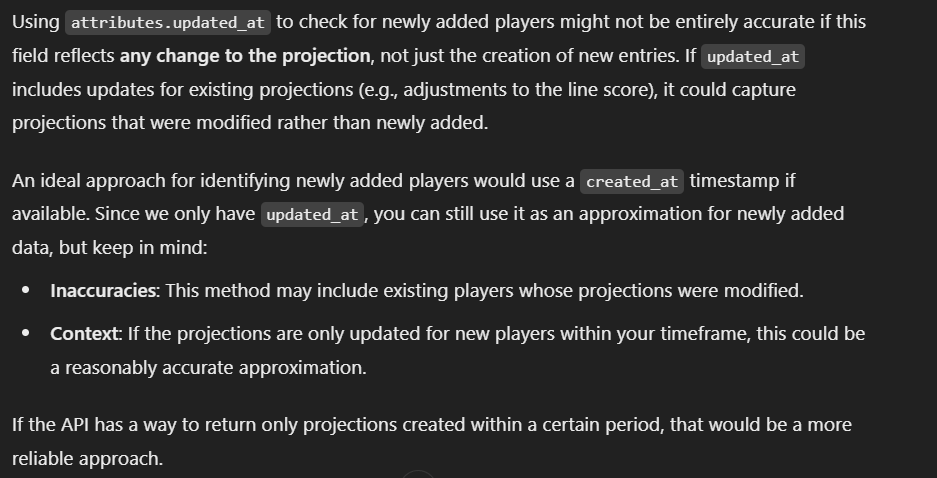